In [1]:
import os, sys, math
sys.path.insert(0, '..')

from src import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smplotlib
import networkx as nx

In [2]:
def visualize_graph_with_event_counts_on_ax(G, grid_size, ax):
    ax.set_xlim(0, grid_size[0])
    ax.set_ylim(0, grid_size[1])
    
    # Draw the edges
    for u, v, data in G.edges(data=True):
        ax.plot([u[0], v[0]], [u[1], v[1]], color='blue', linewidth=data['weight'])
    
    # Draw nodes
    for node in G.nodes():
        ax.scatter(*node, c='red', s=50)


### Basic Visualization

In [3]:
world = gridworld.GridWorld(
    grid_size=(1000000, 1000000),
    n_locations=100,
    n_locales = 16
)

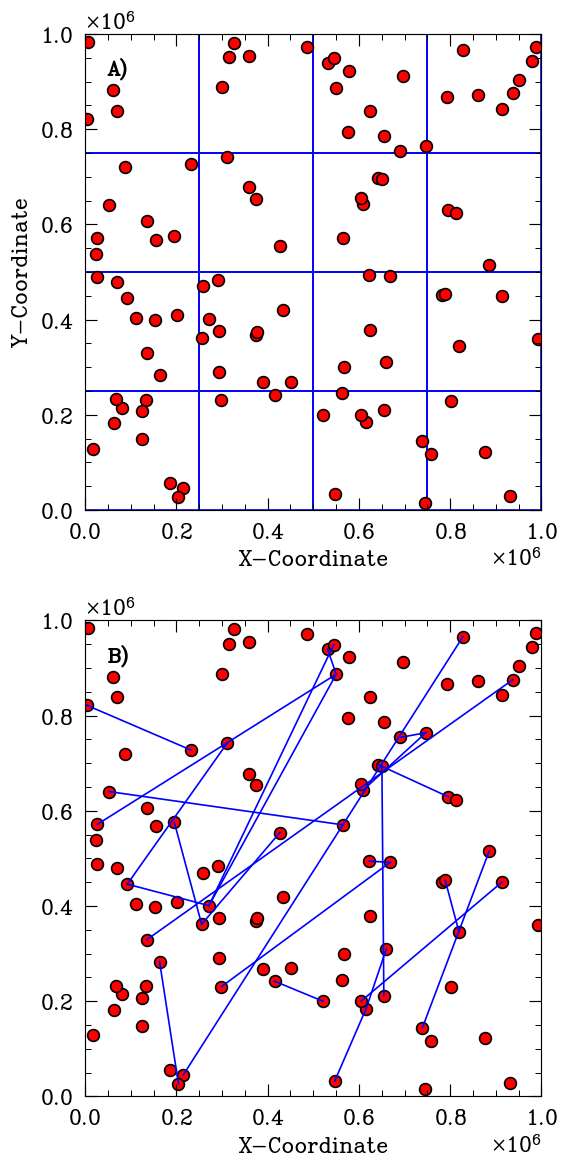

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

world.visualize_grid_on_ax(axes[0])
axes[0].set_xlabel("X-Coordinate")
axes[0].set_ylabel("Y-Coordinate")
axes[0].text(0.05, 0.95, 'A)', 
         transform=axes[0].transAxes, 
         verticalalignment='top', 
         horizontalalignment='left', 
         fontweight='bold'
)

G_inverse_distance = world.generate_event_network(25, 'inverse_distance')
visualize_graph_with_event_counts_on_ax(G_inverse_distance, world.grid_size, axes[1])
axes[1].set_xlabel("X-Coordinate")
axes[1].text(0.05, 0.95, 'B)', 
         transform=axes[1].transAxes, 
         verticalalignment='top', 
         horizontalalignment='left', 
         fontweight='bold'
)

plt.tight_layout()
plt.savefig("gridworld_example_compact.png")
plt.show()